# Discussion 2
### Utilizing synthesized data to better understand ridge and lasso regression

Thursday, January 16th, 2025

## Introduction

In this week’s discussion section, we will create some interactive plots to better undertsand how lasso and ridge regression are at work. To do so, we will use synthesized data that is made with the intention of better understanding how ridge and lasso regression are different based on the relationship of your parameters. It is important to note that your results with real data may look very different - unlike this notebook, the real world data you will be working with was not made to better understand regression models.

## Data Loading

Copy the code below to load the neessary libraries genereate the data we will use. Read the comments to on each feature to get an idea of the relationship between variables.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

## Regression

Now that you have your data, do the following:

1. Split your data into training and testing.
2. Create and fit a ridge regression
3. Calculate the MSE and for your ridge regression.
4. Create and fit a lasso model.
5. Calculate the MSE and for your lasso model.

In [2]:
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [3]:
# Create and fit ridge regression model 
ridge_model = Ridge() # default alpha is 10 
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Calc MSE and R2 for Ridge Regression 

ridge_rsme = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge RMSE: ", ridge_rsme)
print("Ridge R2: ", ridge_r2)

Ridge RMSE:  0.14410020171824975
Ridge R2:  0.9984722762470865


In [4]:
# Create and fit Lasso regression model 
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calc RMSE and R2 for Lasso regression 
lasso_rsme = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso RMSE: ", lasso_rsme)
print("Lasso R2: ", lasso_r2)

Lasso RMSE:  1.2984978990079017
Lasso R2:  0.8759496036905758


## Visualizing Ridge vs Regression

1. Create a plot that looks at the alpha against the MSE for both lasso and ridge regression.
2. Create an interactive plot (for both lasso and ridge) that allows you to adjust alpha to see how the actual vs predicted values are changing.
3. Create three different bar plots with the following guidelines:
- Each plot should represent a different alpha value: Alpha = 0.1, Alpha = 1, Alpha = 10
- Each plot should show how both the ridge and lasso model performed
- The y axis should represent the six different variables: X1, X2, X1_corr, X2_corr, Noise1, Noise2
- The y axis should represent the coefficients

### Coefficient Bar Plot 

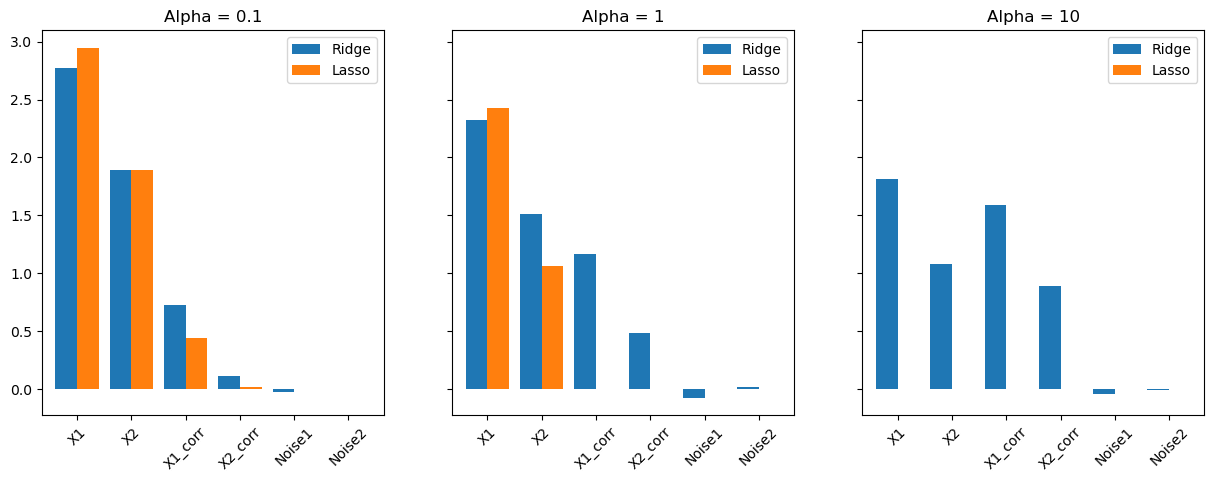

In [5]:
alphas = [0.1, 1, 10]
data = []

# Create a new model for each of these alphas 
for alpha in alphas: 
    ridge = Ridge(alpha=alpha).fit(X,y)
    lasso = Lasso(alpha=alpha).fit(X,y)
    
    data.append(pd.DataFrame({
       'Ridge': ridge.coef_,
        'Lasso': lasso.coef_
    }, index = ['X1', 'X2', 'X1_corr', 'X2_corr', 'Noise1', 'Noise2']))
    
    
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey=True)
for i,df in enumerate(data):
    df.plot.bar(ax=axes[i], width = 0.8)
    axes[i].set_title(f"Alpha = {alphas[i]}")
    axes[i].set_xticklabels(df.index, rotation = 45)
    
plt.show()

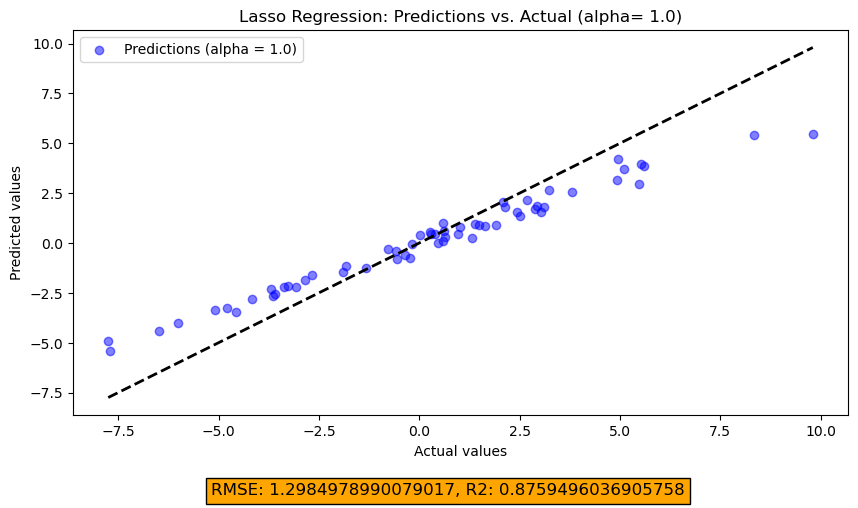

interactive(children=(FloatLogSlider(value=1.0, description='Alpha', max=3.0, min=-3.0), Dropdown(description=…

<function __main__.update_alphas(alpha, model_type)>

In [6]:
# Create a function to view different alpha values on plot
def update_alphas(alpha, model_type):
    if model_type == 'Lasso':
        model = Lasso(alpha = alpha)
    else: 
        model = Ridge(alpha = alpha)
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    plt.figure(figsize = (10,5))
    plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5, label = f'Predictions (alpha = {alpha})')
    plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{model_type} Regression: Predictions vs. Actual (alpha= {alpha})')
    plt.ylabel('Predicted values')
    plt.xlabel('Actual values')
    plt.legend()
    plt.figtext(0.5, -0.05, f'RMSE: {rmse}, R2: {r2}', ha = "center", fontsize = 12, bbox = {'facecolor': 'orange'})
    plt.show() 
    
# Create interactive widgets 
alpha_slider = FloatLogSlider(value = 1.0, base = 10, min = -3, max = 3, step = 0.1, description= 'Alpha') # base 10, min = 10^-3, max = 10^3
model_selector = {'Lasso Model':'Lasso', 'Ridge': 'Ridge'}

interact(update_alphas, alpha = alpha_slider, model_type = model_selector)